In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf
np.random.seed(666)
plt.rcParams['figure.figsize'] = (15,9)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
# df = df.convert_dtypes()
# df.info()

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


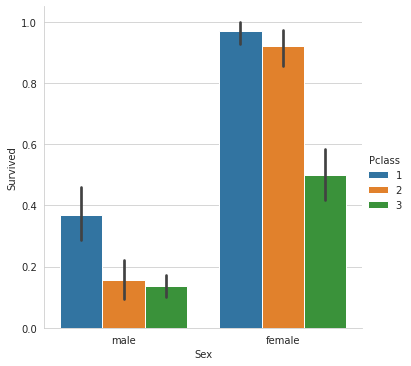

In [6]:
#plt.figure(figsize=(15, 9))
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df);
#plt.savefig('01_sbc.png')

In [7]:
df['Pclass'].replace({1:'FirstC', 2:'SecondC', 3:'ThirdC'}, inplace = True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


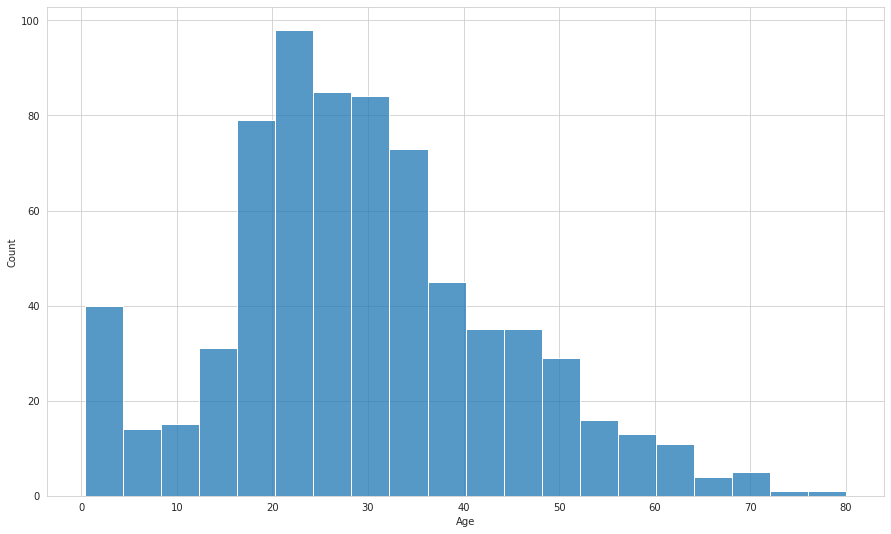

In [8]:
sns.histplot(df['Age']);

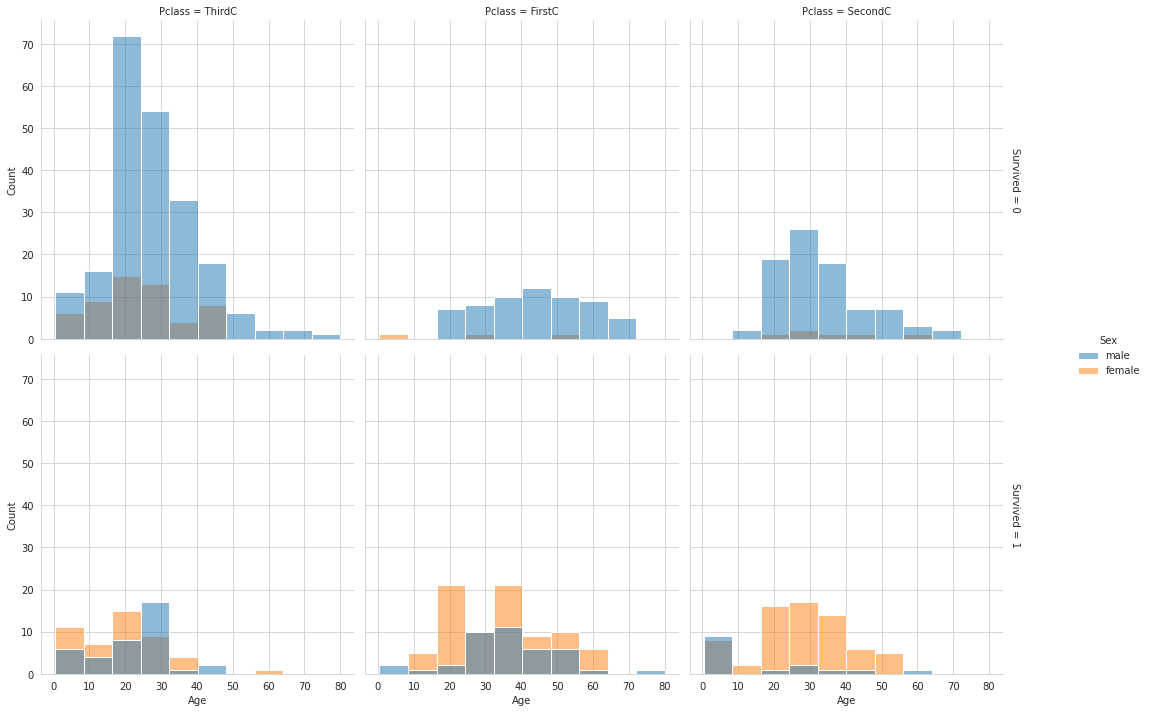

In [9]:
sns.displot(df, x='Age', hue='Sex', col='Pclass', row='Survived', facet_kws=dict(margin_titles=True), bins=10);

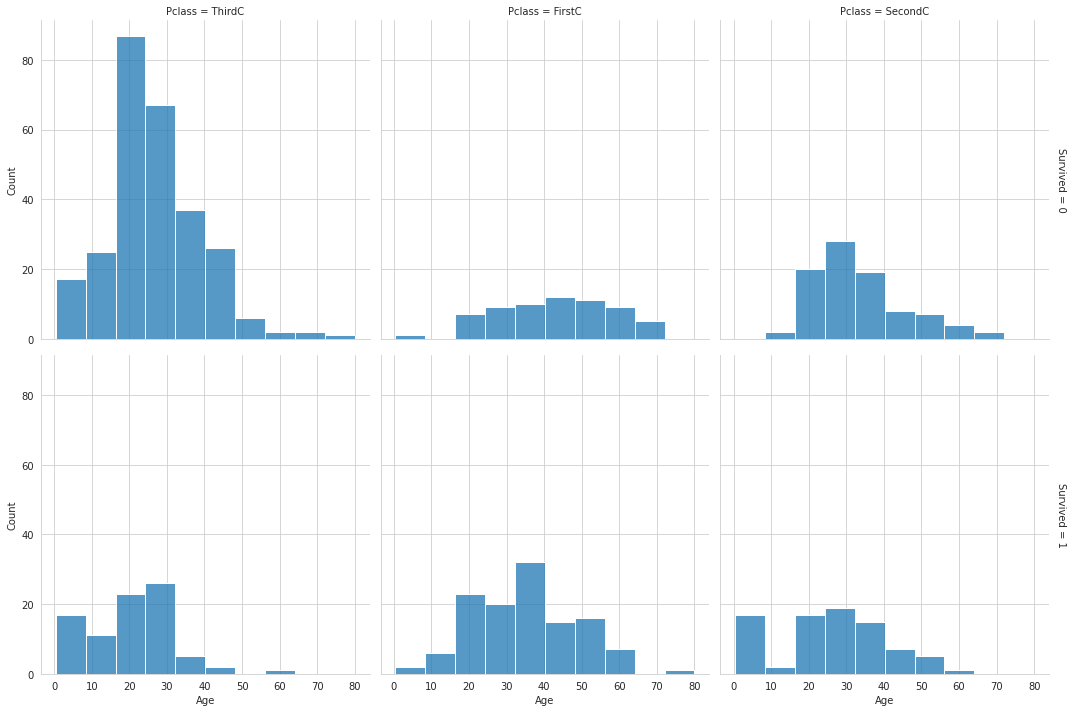

In [10]:
sns.displot(df, x='Age', col='Pclass', row='Survived', facet_kws=dict(margin_titles=True), bins=10);

In [11]:
medians = df.groupby(['Pclass','Sex'])['Age'].transform('median')
df['Age'] = df['Age'].fillna(medians)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df['ChildB'] = df['Age'].apply(lambda x: 'Child' if x <= 17 else 'Adult')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ChildB
PassengerId,,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


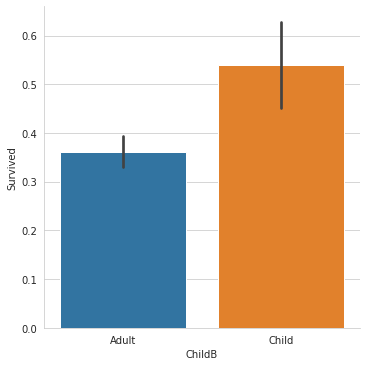

In [13]:
sns.catplot(x="ChildB", y="Survived", kind="bar", data=df);

In [14]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'].replace({'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}, inplace = True)

In [15]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ChildB
PassengerId,,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Adult
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adult
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Adult
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Adult
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Adult


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  ChildB    891 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 130.5+ KB


In [17]:
min_max_scaler = MinMaxScaler()
df['FareScaled'] = min_max_scaler.fit_transform(df[['Fare']])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ChildB,FareScaled
PassengerId,,,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Adult,0.014151
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adult,0.139136
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Adult,0.015469
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Adult,0.103644
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Adult,0.015713


In [18]:
df["Family_Size"] = df["SibSp"] + df["Parch"] + 1
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ChildB,FareScaled,Family_Size
PassengerId,,,,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Adult,0.014151,2
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adult,0.139136,2
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Adult,0.015469,1
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Adult,0.103644,2
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Adult,0.015713,1


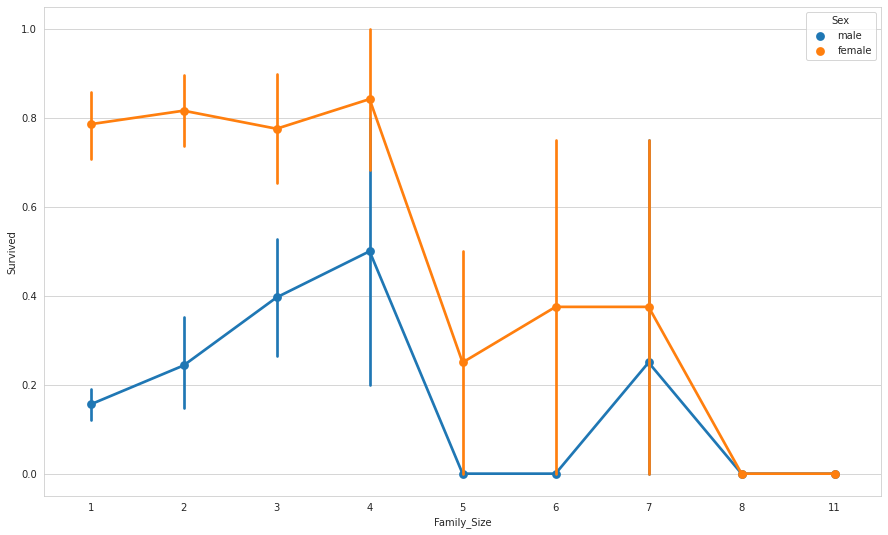

In [19]:
sns.pointplot(x="Family_Size", y="Survived", hue="Sex", data=df);

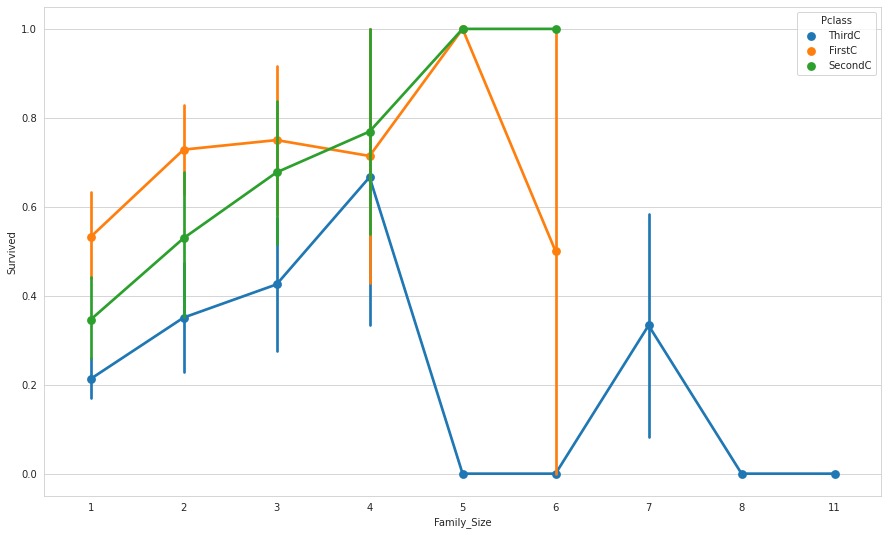

In [20]:
sns.pointplot(x="Family_Size", y="Survived", hue="Pclass", data=df);

In [21]:
df = pd.concat([df,pd.get_dummies(df['Pclass'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Sex'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Embarked'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['ChildB'])],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FirstC,SecondC,ThirdC,female,male,Cherbourg,Queenstown,Southampton,Adult,Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,1,0,1,0,0,1,1,0
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,1,0,1,0,0,1,0
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,1,1,0,0,0,1,1,0
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,1,0,0,1,0,0,0,1,1,0
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,0,1,0,1,0,0,1,1,0


In [22]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'ChildB', 'FareScaled', 'Family_Size',
       'FirstC', 'SecondC', 'ThirdC', 'female', 'male', 'Cherbourg',
       'Queenstown', 'Southampton', 'Adult', 'Child'],
      dtype='object')

In [23]:
df.loc[:,'FareScaled':'Child'].head()

,FareScaled,Family_Size,FirstC,SecondC,ThirdC,female,male,Cherbourg,Queenstown,Southampton,Adult,Child
PassengerId,,,,,,,,,,,,
1,0.014151,2,0,0,1,0,1,0,0,1,1,0
2,0.139136,2,1,0,0,1,0,1,0,0,1,0
3,0.015469,1,0,0,1,1,0,0,0,1,1,0
4,0.103644,2,1,0,0,1,0,0,0,1,1,0
5,0.015713,1,0,0,1,0,1,0,0,1,1,0


In [24]:
# smf_LR_m = smf.logit(formula = 'Survived ~ FareScaled + Family_Size + FirstC + SecondC + ThirdC + female + Cherbourg + Queenstown + Southampton + Child',
#                      data=df).fit()
# smf_LR_m.summary()

"""
Throws the following error:
Cannot interpret 'Int64Dtype()' as a data type
discussed at https://github.com/rapidsai/cudf/issues/5928

due to df = df.convert_dtypes()
sklearn runs into quite a few problems unless this data type conversion is done
???.. !!!..
""";

In [25]:
exp_df_X = df[['FareScaled', 'Family_Size', 'FirstC', 'SecondC', 'ThirdC', 'female', 'Cherbourg', 'Queenstown',	'Southampton', 'Child']]
exp_df_y = df['Survived']
exp_df_X.shape, exp_df_y.shape

((891, 10), (891,))

In [26]:
exp_df_X.head()

,FareScaled,Family_Size,FirstC,SecondC,ThirdC,female,Cherbourg,Queenstown,Southampton,Child
PassengerId,,,,,,,,,,
1,0.014151,2,0,0,1,0,0,0,1,0
2,0.139136,2,1,0,0,1,1,0,0,0
3,0.015469,1,0,0,1,1,0,0,1,0
4,0.103644,2,1,0,0,1,0,0,1,0
5,0.015713,1,0,0,1,0,0,0,1,0


In [27]:
random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=6, random_state=999)
random_forest.fit(exp_df_X, exp_df_y)
round(random_forest.score(exp_df_X, exp_df_y),2)

0.86

In [28]:
var_imp_dic = dict(zip(exp_df_X.columns, random_forest.feature_importances_))
var_imp_dic_df = pd.DataFrame.from_dict(var_imp_dic, orient='index')
var_imp_dic_df.columns = ['VarImp']
var_imp_dic_df.reset_index(inplace=True)
var_imp_dic_df = var_imp_dic_df.rename(columns = {'index':'Var'})
var_imp_dic_df = var_imp_dic_df.sort_values(by='VarImp', ascending = False)
var_imp_dic_df

,Var,VarImp
5,female,0.412374
0,FareScaled,0.220439
1,Family_Size,0.101798
4,ThirdC,0.091566
2,FirstC,0.053410
9,Child,0.047461
3,SecondC,0.024250
8,Southampton,0.022356
6,Cherbourg,0.014739
7,Queenstown,0.011608


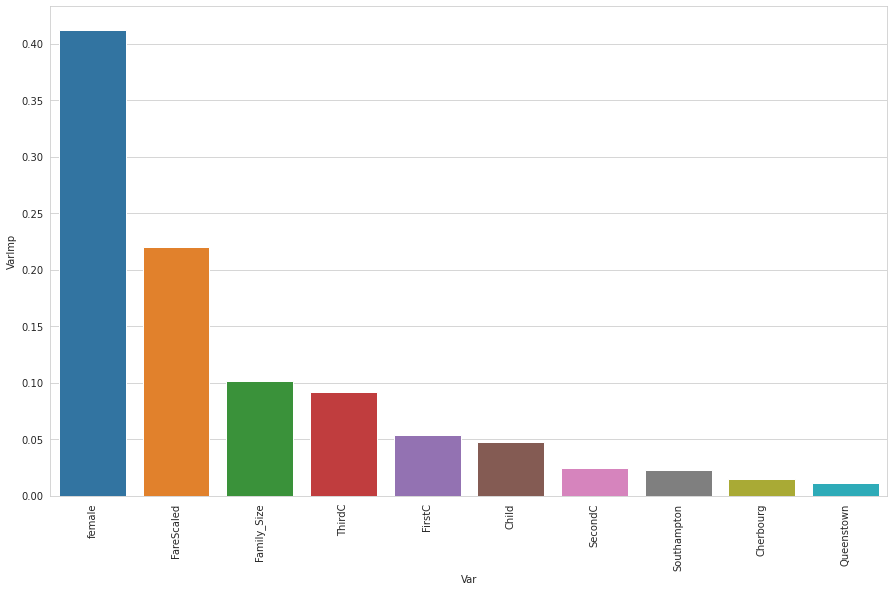

In [29]:
bp = sns.barplot(x='Var', y='VarImp', data=var_imp_dic_df)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90);

In [30]:
"""
include female, FareScaled, ThirdC, Family_Size,FirstC, Child in interactions
""";

In [31]:
X = df[['female', 'FareScaled', 'ThirdC', 'Family_Size', 'FirstC', 'Child']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

In [32]:
interaction_features = X.columns
interaction_pipeline = Pipeline([('interaction_term', PolynomialFeatures(interaction_only=True, include_bias=False))])
feature_engineering = ColumnTransformer([('interaction_term', interaction_pipeline, interaction_features)])
feature_engineering.fit(X_train)

ColumnTransformer(transformers=[('interaction_term',
                                 Pipeline(steps=[('interaction_term',
                                                  PolynomialFeatures(include_bias=False,
                                                                     interaction_only=True))]),
                                 Index(['female', 'FareScaled', 'ThirdC', 'Family_Size', 'FirstC', 'Child'], dtype='object'))])

In [33]:
X_train_fe = pd.DataFrame(feature_engineering.transform(X_train))
X_train_fe.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.113168,0.0,2.0,1.0,1.0,0.113168,0.0,2.0,1.0,...,0.000000,0.226336,0.113168,0.113168,0.0,0.0,0.0,2.0,2.0,1.0
1,0.0,0.015127,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.015127,0.015127,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.014102,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.014102,0.014102,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.015094,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.015094,0.015094,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.123667,0.0,2.0,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.247334,0.123667,0.000000,0.0,0.0,0.0,2.0,0.0,0.0


In [34]:
logistic_regression = LogisticRegression(random_state=321, max_iter=5000, class_weight='balanced')
logistic_regression.fit(X_train_fe, y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=321)

In [35]:
print(f'The training accuracy of the LR model is {round(logistic_regression.score(X_train_fe, y_train), 2)}')

The training accuracy of the LR model is 0.8


In [36]:
cross_val_accuracy = cross_val_score(estimator=logistic_regression, X=X_train_fe, y=y_train, cv=5, scoring='accuracy')
print("cross-validation accuracy scores of the LR model are", cross_val_accuracy)

cross-validation accuracy scores of the LR model are [0.76923077 0.75524476 0.79577465 0.79577465 0.83098592]


In [37]:
print(f'The average cross validation accuracy of the LR CV model is {round(cross_val_accuracy.mean(), 2)}')

The average cross validation accuracy of the LR CV model is 0.79


In [38]:
precision = cross_val_score(logistic_regression, X_train_fe, y_train, cv=5, scoring='precision')
print("Precision CV LR scores are", precision)

Precision CV LR scores are [0.73469388 0.68421053 0.74074074 0.76       0.76271186]


In [39]:
print(f'The average precision of the CV LR model is {round(precision.mean(), 2)}')

The average precision of the CV LR model is 0.74


In [40]:
recall = cross_val_score(logistic_regression, X_train_fe, y_train, cv=5, scoring='recall')
print("CV LR recall scores are", recall)

CV LR recall scores are [0.64285714 0.69642857 0.72727273 0.69090909 0.81818182]


In [41]:
print(f'The average CV LR recall of the model is {round(recall.mean(), 2)}')

The average CV LR recall of the model is 0.72


In [42]:
random_forest.fit(X_train_fe, y_train)
round(random_forest.score(X_train_fe, y_train), 2)

0.86

In [43]:
RF_CV_acc = cross_val_score(estimator=random_forest, X=X_train_fe, y=y_train, cv=5, scoring='accuracy')
RF_CV_acc, RF_CV_acc.mean()

(array([0.84615385, 0.8041958 , 0.83098592, 0.81690141, 0.85211268]),
 0.83006993006993)

In [44]:
# go with RF

In [45]:
X_test_fe = pd.DataFrame(feature_engineering.transform(X_test))

In [46]:
X_test_fe.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.021731,1.0,3.0,0.0,1.0,0.021731,1.0,3.0,0.0,...,0.021731,0.065192,0.000000,0.021731,3.0,0.0,1.0,0.0,3.0,0.0
1,0.0,0.014110,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.014110,0.014110,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.054164,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.054164,0.054164,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.065388,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.065388,0.065388,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.028213,1.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.028213,0.056425,0.000000,0.000000,2.0,0.0,0.0,0.0,0.0,0.0


In [47]:
print(f'The accuracy of the CV RF model for the test data is {round(random_forest.score(X_test_fe, y_test), 2)}')

The accuracy of the CV RF model for the test data is 0.87
